# Contact Kinematics

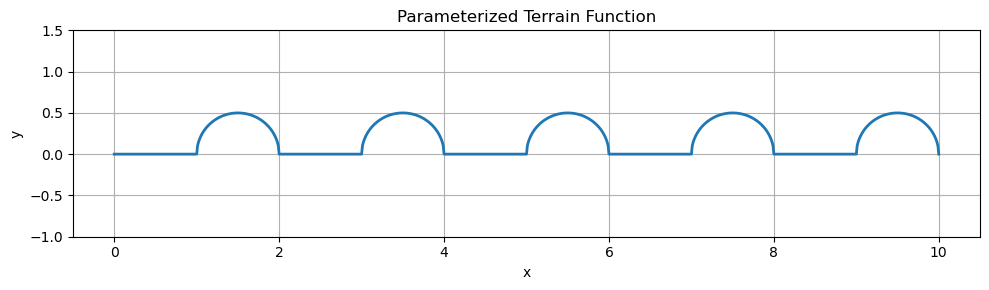

In [1]:
import numpy as np
import matplotlib.pyplot as plt

a = 1.0       
r = 0.5      
x0 = 0.0     
k_max = 5 

x_vals = []
y_vals = []

for k in range(k_max):
    base = x0 + (a + 2 * r) * k
    
    x_flat = np.linspace(base, base + a, 100)
    y_flat = np.zeros_like(x_flat)
    
    x_arc = np.linspace(base + a, base + a + 2 * r, 100)
    y_arc = np.sqrt(r**2 - (x_arc - (base + a + r))**2)
    
    x_vals.extend(x_flat)
    y_vals.extend(y_flat)
    x_vals.extend(x_arc)
    y_vals.extend(y_arc)

plt.figure(figsize=(10, 3))
plt.plot(x_vals, y_vals, linewidth=2)
plt.title("Parameterized Terrain Function")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()


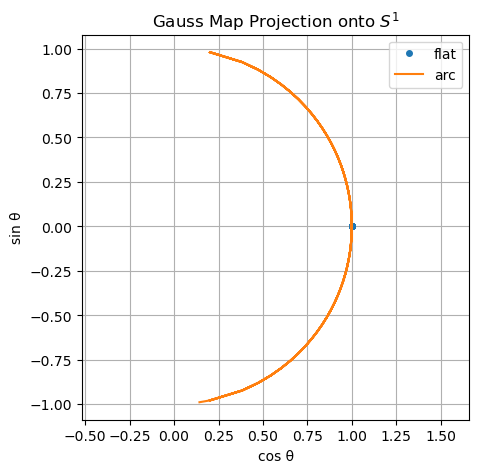

In [7]:
import numpy as np
import matplotlib.pyplot as plt

a = 1.0
r = 0.5
x0 = 0.0
k_max = 5

x_all = []
y_all = []
labels = [] 

for k in range(k_max):
    base = x0 + (a + 2 * r) * k

    x_flat = np.linspace(base, base + a, 50)
    y_flat = np.zeros_like(x_flat)
    x_all.extend(x_flat)
    y_all.extend(y_flat)
    labels.extend(['flat'] * len(x_flat))

    x_arc = np.linspace(base + a, base + a + 2 * r, 50)
    y_arc = np.sqrt(r**2 - (x_arc - (base + a + r))**2)
    x_all.extend(x_arc)
    y_all.extend(y_arc)
    labels.extend(['arc'] * len(x_arc))

x_all = np.array(x_all)
y_all = np.array(y_all)
labels = np.array(labels)

dy = np.gradient(y_all, x_all)
dy = np.clip(dy, -1e3, 1e3)  
dx = np.ones_like(dy)

theta = np.arctan2(dy, dx)
unit_vectors = np.vstack((np.cos(theta), np.sin(theta)))

flat_idx = labels == 'flat'
arc_idx = labels == 'arc'

flat_uv = unit_vectors[:, flat_idx]
arc_uv = unit_vectors[:, arc_idx]

plt.figure(figsize=(5, 5))
plt.plot(flat_uv[0], flat_uv[1], 'o', color='tab:blue', label='flat', markersize=4)
plt.plot(arc_uv[0], arc_uv[1], '-', color='tab:orange', label='arc', linewidth=1.5)

plt.title("Gauss Map Projection onto $S^1$")
plt.xlabel("cos θ")
plt.ylabel("sin θ")
plt.axis('equal')
plt.grid(True)
plt.legend()
plt.show()